# Data walkthrough

In [1]:
%pip install pymc

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az
import numpy as np

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
headers_origination = [
    'credit_score',
    'first_payment_date', 
    'first_time_homebuyer_flag',
    'maturity_date',
    'metropolitan_statistical_area',
    'mortgage_insurance_percentage',
    'number_of_units',
    'occupancy_status',
    'original_cltv',
    'original_dti_ratio',
    'original_upb',
    'original_ltv',
    'original_interest_rate',
    'channel',
    'ppm_flag',
    'amortization_type',
    'property_state',
    'property_type',
    'postal_code',
    'loan_sequence_number',
    'loan_purpose',
    'original_loan_term',
    'number_of_borrowers',
    'seller_name',
    'servicer_name',
    'super_conforming_flag',
    'pre_harp_loan_sequence_number',
    'program_indicator',
    'harp_indicator',
    'property_valuation_method',
    'interest_only_indicator',
    'mortgage_insurance_cancellation_indicator'
]

headers_performance = [
    'loan_sequence_number',
    'monthly_reporting_period',
    'current_actual_upb', 
    'current_loan_delinquency_status',
    'loan_age',
    'remaining_months_to_legal_maturity',
    'defect_settlement_date',
    'modification_flag',
    'zero_balance_code',
    'zero_balance_effective_date',
    'current_interest_rate',
    'current_deferred_upb',
    'due_date_of_last_paid_installment',
    'mi_recoveries',
    'net_sales_proceeds',
    'non_mi_recoveries',
    'expenses',
    'legal_costs',
    'maintenance_and_preservation_costs', 
    'taxes_and_insurance',
    'miscellaneous_expenses',
    'actual_loss_calculation',
    'modification_cost',
    'step_modification_flag',
    'deferred_payment_plan',
    'estimated_loan_to_value',
    'zero_balance_removal_upb',
    'delinquent_accrued_interest',
    'delinquency_due_to_disaster',
    'borrower_assistance_program_code',
    'current_month_modification_cost',
    'interest_bearing_upb'
]



In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)


In [ ]:

# Read the first 10 rows of a text file from the data folder
# Using nrows=10 parameter to limit the rows
data_sample = pd.read_csv('data/historical_data_2011Q1.txt', sep='|', nrows=5, names=headers_origination)

# Display the sample data
print("First 10 rows of Q1_2019.txt:")

display(data_sample)

In [16]:
data_sample.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   credit_score                               5 non-null      int64  
 1   first_payment_date                         5 non-null      int64  
 2   first_time_homebuyer_flag                  5 non-null      object 
 3   maturity_date                              5 non-null      int64  
 4   metropolitan_statistical_area              4 non-null      float64
 5   mortgage_insurance_percentage              5 non-null      int64  
 6   number_of_units                            5 non-null      int64  
 7   occupancy_status                           5 non-null      object 
 8   original_cltv                              5 non-null      int64  
 9   original_dti_ratio                         5 non-null      int64  
 10  original_upb                  

In [5]:
import pandas as pd

# Read the first 10 rows of a text file from the data folder
# Using nrows=10 parameter to limit the rows
data_sample_performance = pd.read_csv('data/historical_data_time_2011Q1.txt', sep='|', nrows=10, names=headers_performance)

# Display the sample data
print("First 10 rows of Q1_2019.txt:")
display(data_sample_performance)

First 10 rows of Q1_2019.txt:


,loan_sequence_number,monthly_reporting_period,current_actual_upb,current_loan_delinquency_status,loan_age,remaining_months_to_legal_maturity,defect_settlement_date,modification_flag,zero_balance_code,zero_balance_effective_date,current_interest_rate,current_deferred_upb,due_date_of_last_paid_installment,mi_recoveries,net_sales_proceeds,non_mi_recoveries,expenses,legal_costs,maintenance_and_preservation_costs,taxes_and_insurance,miscellaneous_expenses,actual_loss_calculation,modification_cost,step_modification_flag,deferred_payment_plan,estimated_loan_to_value,zero_balance_removal_upb,delinquent_accrued_interest,delinquency_due_to_disaster,borrower_assistance_program_code,current_month_modification_cost,interest_bearing_upb
0,F11Q10000001,201102,250000.00,0,0,180,NaN,NaN,NaN,NaN,3.625,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250000.00
1,F11Q10000001,201103,248000.00,0,1,179,NaN,NaN,NaN,NaN,3.625,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248000.00
2,F11Q10000001,201104,247000.00,0,2,178,NaN,NaN,NaN,NaN,3.625,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247000.00
3,F11Q10000001,201105,247000.00,0,3,177,NaN,NaN,NaN,NaN,3.625,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247000.00
4,F11Q10000001,201106,245000.00,0,4,176,NaN,NaN,NaN,NaN,3.625,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245000.00
5,F11Q10000001,201107,244000.00,0,5,175,NaN,NaN,NaN,NaN,3.625,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,244000.00
6,F11Q10000001,201108,243000.00,0,6,174,NaN,NaN,NaN,NaN,3.625,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243000.00
7,F11Q10000001,201109,243174.60,1,7,173,NaN,NaN,NaN,NaN,3.625,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243174.60
8,F11Q10000001,201110,242110.20,0,8,172,NaN,NaN,NaN,NaN,3.625,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,242110.20
9,F11Q10000001,201111,239648.24,0,9,171,NaN,NaN,NaN,NaN,3.625,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239648.24


In [6]:
data_performance = pd.read_csv('data/historical_data_time_2011Q1.txt', sep='|', names=headers_performance)

C:\Users\arovi\AppData\Local\Temp\ipykernel_34516\2409789350.py:1: DtypeWarning: Columns (3,7,23,24,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data_performance = pd.read_csv('data/historical_data_time_2011Q1.txt', sep='|', names=headers_performance)


In [7]:
data_origination = pd.read_csv('data/historical_data_2011Q1.txt', sep='|', names=headers_origination)


In [8]:
data_origination.head()

,credit_score,first_payment_date,first_time_homebuyer_flag,maturity_date,metropolitan_statistical_area,mortgage_insurance_percentage,number_of_units,occupancy_status,original_cltv,original_dti_ratio,original_upb,original_ltv,original_interest_rate,channel,ppm_flag,amortization_type,property_state,property_type,postal_code,loan_sequence_number,loan_purpose,original_loan_term,number_of_borrowers,seller_name,servicer_name,super_conforming_flag,pre_harp_loan_sequence_number,program_indicator,harp_indicator,property_valuation_method,interest_only_indicator,mortgage_insurance_cancellation_indicator
0,720,201103,N,202602,16984.0,0,1,P,87,46,250000,78,3.625,R,N,FRM,IL,SF,60400,F11Q10000001,N,180,1,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,9
1,795,201103,N,202602,30460.0,0,1,P,69,32,168000,69,4.375,R,N,FRM,KY,SF,40300,F11Q10000002,N,180,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,9
2,770,201103,N,202602,NaN,0,1,P,75,37,171000,75,3.625,R,N,FRM,MN,SF,55700,F11Q10000003,N,180,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,9
3,785,201103,N,202602,16974.0,0,1,P,71,999,141000,71,3.500,R,N,FRM,IL,SF,60400,F11Q10000004,N,180,1,Other sellers,Other servicers,NaN,F09Q10001946,9,Y,9,N,9
4,756,201104,N,204103,16974.0,0,1,P,103,999,352000,103,5.375,R,N,FRM,IL,CO,60600,F11Q10000005,N,360,1,Other sellers,Other servicers,NaN,F08Q40000273,9,Y,9,N,9


In [9]:
key_origination_columns = [
    'credit_score',              # Key risk factor
    'original_dti_ratio',        # Key risk factor
    'original_ltv',              # Key risk factor
    'original_upb',              # Loan size
    'original_interest_rate',    # Cost of borrowing
    'loan_sequence_number',      # To link with performance data
    'number_of_borrowers',       # Risk factor
    'first_time_homebuyer_flag', # Borrower experience
    'property_state',            # Geographic factor
    'occupancy_status'          # Property usage
]

key_performance_columns = [
    'loan_sequence_number',                  # To link with origination data
    'monthly_reporting_period',              # Time dimension
    'current_loan_delinquency_status',       # Target variable for state transitions
    'current_actual_upb',                    # Current loan balance
    'loan_age',                             # Time from origination
    'current_interest_rate',                 # Current rate
    'modification_flag',                     # Loan modification indicator
    'zero_balance_code'                      # Terminal states
]

In [10]:
def prepare_mortgage_data(data_origination, data_performance):
    # Select relevant columns from origination data
    orig_features = data_origination[key_origination_columns].copy()
    
    # Select relevant columns from performance data
    perf_features = data_performance[key_performance_columns].copy()
    
    # Merge the datasets
    merged_data = perf_features.merge(
        orig_features,
        on='loan_sequence_number',
        how='left'
    )
    
    return merged_data

data_merged = prepare_mortgage_data(data_origination, data_performance)

data_merged.head()

,loan_sequence_number,monthly_reporting_period,current_loan_delinquency_status,current_actual_upb,loan_age,current_interest_rate,modification_flag,zero_balance_code,credit_score,original_dti_ratio,original_ltv,original_upb,original_interest_rate,number_of_borrowers,first_time_homebuyer_flag,property_state,occupancy_status
0,F11Q10000001,201102,0,250000.0,0,3.625,NaN,NaN,720,46,78,250000,3.625,1,N,IL,P
1,F11Q10000001,201103,0,248000.0,1,3.625,NaN,NaN,720,46,78,250000,3.625,1,N,IL,P
2,F11Q10000001,201104,0,247000.0,2,3.625,NaN,NaN,720,46,78,250000,3.625,1,N,IL,P
3,F11Q10000001,201105,0,247000.0,3,3.625,NaN,NaN,720,46,78,250000,3.625,1,N,IL,P
4,F11Q10000001,201106,0,245000.0,4,3.625,NaN,NaN,720,46,78,250000,3.625,1,N,IL,P


Starting data cleaning process...
Cleaning DTI ratios...
Cleaning credit scores...
Cleaning interest rates...
Cleaning LTV ratios...
Cleaning delinquency status...
Handling missing values...
Creating default indicator...
Converting categorical variables...
Standardizing numeric features...
Removing any remaining missing values...

Data cleaning complete!
Final shape: (23071732, 25)

Summary statistics for key features:


,credit_score,original_ltv,original_interest_rate,is_default,current_loan_delinquency_status
count,2.307173e+07,2.307173e+07,2.307173e+07,2.307173e+07,2.307173e+07
mean,7.537988e+02,6.918342e+01,4.683837e+00,5.592991e-03,6.883042e-02
std,4.921582e+01,2.148436e+01,4.772329e-01,7.457687e-02,1.077066e+00
min,3.330000e+02,4.000000e+00,2.500000e+00,0.000000e+00,0.000000e+00
25%,7.240000e+02,5.500000e+01,4.375000e+00,0.000000e+00,0.000000e+00
50%,7.660000e+02,7.300000e+01,4.750000e+00,0.000000e+00,0.000000e+00
75%,7.920000e+02,8.000000e+01,5.000000e+00,0.000000e+00,0.000000e+00
max,8.440000e+02,1.250000e+02,7.125000e+00,1.000000e+00,1.310000e+02



Data quality metrics:
Number of defaults: 129040
Default rate: 0.56%

Delinquency status distribution:


0.0      9.860122e-01
1.0      6.590012e-03
2.0      1.804806e-03
3.0      9.030965e-04
4.0      6.276512e-04
             ...     
109.0    1.300292e-07
108.0    1.300292e-07
107.0    1.300292e-07
122.0    4.334308e-08
131.0    4.334308e-08
Name: current_loan_delinquency_status, Length: 117, dtype: float64

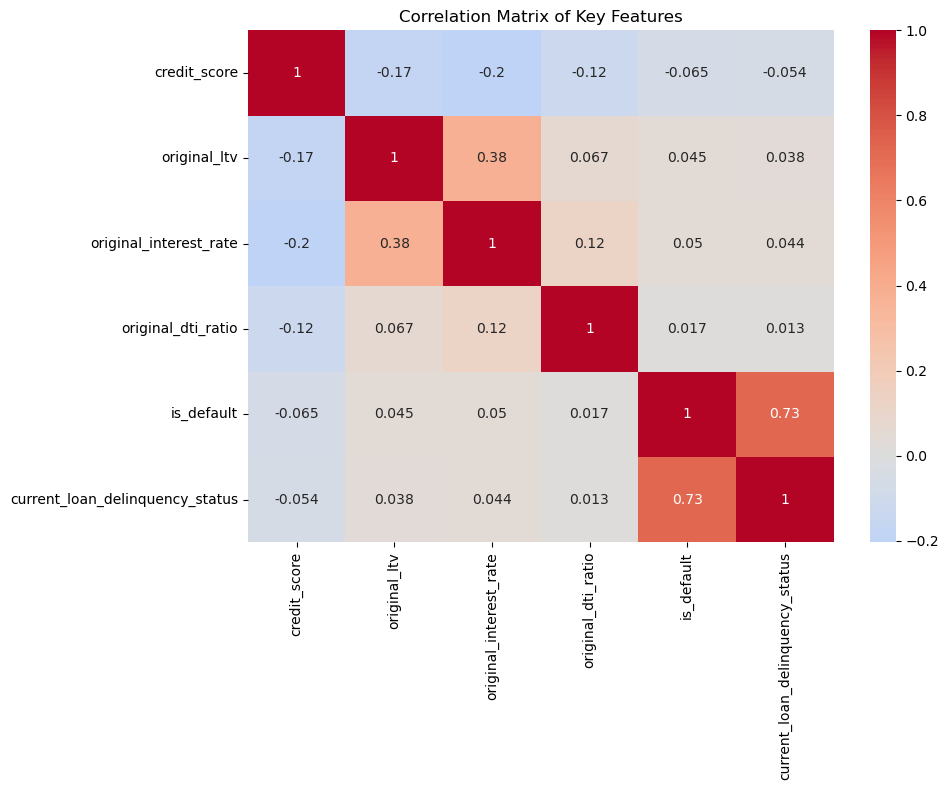

In [11]:
# Data Cleaning Steps
def clean_mortgage_data(df):
    """
    Clean the merged mortgage dataset for MCMC analysis
    """
    print("Starting data cleaning process...")
    df = df.copy()
    
    # 1. Handle DTI Ratio (999 indicates missing)
    print("Cleaning DTI ratios...")
    df['original_dti_ratio'] = df['original_dti_ratio'].replace(999, np.nan)
    
    # 2. Clean credit scores
    print("Cleaning credit scores...")
    df = df[df['credit_score'].between(300, 850)]  # Valid FICO range
    
    # 3. Clean interest rates
    print("Cleaning interest rates...")
    df = df[df['original_interest_rate'].between(0, 30)]  # Remove unrealistic rates
    df = df[df['current_interest_rate'].between(0, 30)]
    
    # 4. Clean LTV ratios
    print("Cleaning LTV ratios...")
    df = df[df['original_ltv'].between(0, 200)]  # Remove extreme LTVs
    
    # 5. Clean delinquency status
    print("Cleaning delinquency status...")
    df['current_loan_delinquency_status'] = pd.to_numeric(
        df['current_loan_delinquency_status'], errors='coerce')
    
    # 6. Handle missing values
    print("Handling missing values...")
    # For numeric columns: fill with median
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        df[col] = df[col].fillna(df[col].median())
    
    # For categorical columns: fill with mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode()[0])
    
    # 7. Create binary default indicator (90+ days delinquent)
    print("Creating default indicator...")
    df['is_default'] = (df['current_loan_delinquency_status'] >= 3).astype(int)
    
    # 8. Convert categorical variables to numeric
    print("Converting categorical variables...")
    # First-time homebuyer flag
    df['first_time_homebuyer_flag'] = (df['first_time_homebuyer_flag'] == 'Y').astype(int)
    
    # Occupancy status (P: Primary, S: Secondary, I: Investment)
    occupancy_map = {'P': 0, 'S': 1, 'I': 2}
    df['occupancy_status'] = df['occupancy_status'].map(occupancy_map)
    
    # Property state (convert to state-level default rate)
    state_default_rates = df.groupby('property_state')['is_default'].mean()
    df['property_state_risk'] = df['property_state'].map(state_default_rates)
    
    # 9. Create standardized versions of numeric features
    print("Standardizing numeric features...")
    features_to_standardize = [
        'credit_score', 
        'original_ltv', 
        'original_interest_rate',
        'current_interest_rate',
        'original_upb',
        'current_actual_upb'
    ]
    
    for feature in features_to_standardize:
        df[f'{feature}_std'] = (df[feature] - df[feature].mean()) / df[feature].std()
    
    # 10. Remove any remaining rows with missing values
    print("Removing any remaining missing values...")
    df = df.dropna()
    
    print("\nData cleaning complete!")
    print(f"Final shape: {df.shape}")
    
    # Print summary statistics
    print("\nSummary statistics for key features:")
    summary_stats = df[['credit_score', 'original_ltv', 'original_interest_rate', 
                       'is_default', 'current_loan_delinquency_status']].describe()
    display(summary_stats)
    
    return df

# Apply cleaning to merged data
cleaned_data = clean_mortgage_data(data_merged)

# Display data quality metrics
print("\nData quality metrics:")
print(f"Number of defaults: {cleaned_data['is_default'].sum()}")
print(f"Default rate: {cleaned_data['is_default'].mean():.2%}")
print("\nDelinquency status distribution:")
display(cleaned_data['current_loan_delinquency_status'].value_counts(normalize=True))

# Create correlation matrix for key numeric features
correlation_features = [
    'credit_score', 
    'original_ltv', 
    'original_interest_rate',
    'original_dti_ratio',
    'is_default',
    'current_loan_delinquency_status'
]

correlation_matrix = cleaned_data[correlation_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Key Features')
plt.tight_layout()
plt.show()


Risk Metrics Summary:
                q50           q75           q90           q95           q99
count  4.614347e+06  4.614347e+06  4.614347e+06  4.614347e+06  4.614347e+06
mean   5.000000e-01  5.000000e-01  5.000000e-01  5.000000e-01  5.000007e-01
std    2.193852e-09  3.919742e-09  9.910377e-09  2.687496e-08  3.446762e-07
min    5.000000e-01  5.000000e-01  5.000000e-01  4.999999e-01  4.999995e-01
25%    5.000000e-01  5.000000e-01  5.000000e-01  5.000000e-01  5.000005e-01
50%    5.000000e-01  5.000000e-01  5.000000e-01  5.000000e-01  5.000007e-01
75%    5.000000e-01  5.000000e-01  5.000000e-01  5.000001e-01  5.000009e-01
max    5.000000e-01  5.000000e-01  5.000001e-01  5.000002e-01  5.000025e-01


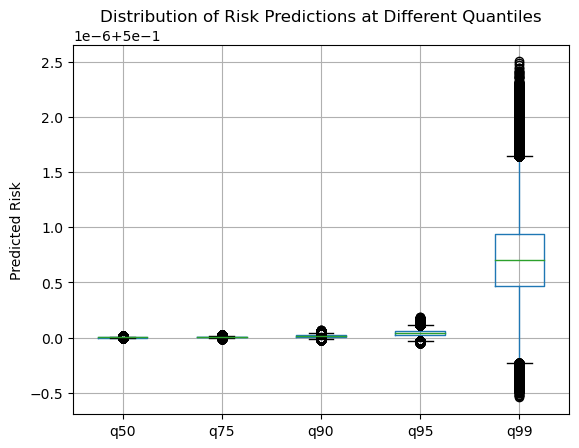

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.regression.quantile_regression import QuantReg

# 1. Data Preparation
def prepare_data(data):
    # Same as before, but without standardization
    data['default'] = (data['current_loan_delinquency_status'] >= 3).astype(int)
    
    features = [
        'credit_score',
        'original_dti_ratio',
        'original_ltv',
        'original_interest_rate',
        'loan_age',
        'number_of_borrowers'
    ]
    
    X = data[features]
    y = data['default']
    
    return X, y

# 2. Quantile Regression Model
def fit_quantile_regression(X, y, quantiles=[0.5, 0.75, 0.9, 0.95, 0.99]):
    models = {}
    for q in quantiles:
        model = QuantReg(y, X)
        results = model.fit(q=q)
        models[q] = results
    return models


# Add a logistic transformation to constrain predictions between 0 and 1
def assess_risk(models, X_new):
    predictions = pd.DataFrame()
    for q, model in models.items():
        # Apply logistic transformation to constrain predictions
        pred = 1 / (1 + np.exp(-model.predict(X_new)))
        predictions[f'q{int(q*100)}'] = pred
    return predictions

# 4. Main execution
# Using your cleaned_data from previous cell
X_scaled, y = prepare_data(cleaned_data)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit models for different quantiles
models = fit_quantile_regression(X_train, y_train)

# Get predictions
predictions = assess_risk(models, X_test)

# Calculate risk metrics
risk_metrics = {
    'median_risk': predictions['q50'],
    'high_risk': predictions['q90'],
    'very_high_risk': predictions['q99']
}

# Display some results
print("\nRisk Metrics Summary:")
print(predictions.describe())

# Optional: Plot distribution of risks at different quantiles
import matplotlib.pyplot as plt
predictions.boxplot()
plt.title('Distribution of Risk Predictions at Different Quantiles')
plt.ylabel('Predicted Risk')
plt.show()

In [14]:
cleaned_data

,loan_sequence_number,monthly_reporting_period,current_loan_delinquency_status,current_actual_upb,loan_age,current_interest_rate,modification_flag,zero_balance_code,credit_score,original_dti_ratio,original_ltv,original_upb,original_interest_rate,number_of_borrowers,first_time_homebuyer_flag,property_state,occupancy_status,is_default,property_state_risk,credit_score_std,original_ltv_std,original_interest_rate_std,current_interest_rate_std,original_upb_std,current_actual_upb_std,default
0,F11Q10000001,201102,0.0,250000.00,0,3.625,P,1.0,720,46.0,78,250000,3.625,1,0,IL,0,0,0.009741,-0.686747,0.410372,-2.21870,-2.207535,0.677943,0.978422,0
1,F11Q10000001,201103,0.0,248000.00,1,3.625,P,1.0,720,46.0,78,250000,3.625,1,0,IL,0,0,0.009741,-0.686747,0.410372,-2.21870,-2.207535,0.677943,0.958661,0
2,F11Q10000001,201104,0.0,247000.00,2,3.625,P,1.0,720,46.0,78,250000,3.625,1,0,IL,0,0,0.009741,-0.686747,0.410372,-2.21870,-2.207535,0.677943,0.948781,0
3,F11Q10000001,201105,0.0,247000.00,3,3.625,P,1.0,720,46.0,78,250000,3.625,1,0,IL,0,0,0.009741,-0.686747,0.410372,-2.21870,-2.207535,0.677943,0.948781,0
4,F11Q10000001,201106,0.0,245000.00,4,3.625,P,1.0,720,46.0,78,250000,3.625,1,0,IL,0,0,0.009741,-0.686747,0.410372,-2.21870,-2.207535,0.677943,0.929020,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23072385,F11Q10335095,202402,0.0,187939.77,156,4.375,P,1.0,737,43.0,80,267000,4.375,2,0,HI,0,0,0.005376,-0.341330,0.503463,-0.64714,-0.638070,0.842798,0.365246,0
23072386,F11Q10335095,202403,0.0,187190.88,157,4.375,P,1.0,737,43.0,80,267000,4.375,2,0,HI,0,0,0.005376,-0.341330,0.503463,-0.64714,-0.638070,0.842798,0.357846,0
23072387,F11Q10335095,202404,0.0,186439.26,158,4.375,P,1.0,737,43.0,80,267000,4.375,2,0,HI,0,0,0.005376,-0.341330,0.503463,-0.64714,-0.638070,0.842798,0.350420,0
23072388,F11Q10335095,202405,0.0,185684.90,159,4.375,P,1.0,737,43.0,80,267000,4.375,2,0,HI,0,0,0.005376,-0.341330,0.503463,-0.64714,-0.638070,0.842798,0.342967,0


In [2]:
import pandas as pd
parquet_file = pd.read_parquet("E:/mmar_project_data\data\performance\historical_data_time_2011Q1.parquet")

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\arovi\AppData\Local\Temp\ipykernel_8756\2624652067.py:2: SyntaxWarning: invalid escape sequence '\m'
  parquet_file = pd.read_parquet("E:\mmar_project_data\data\performance\historical_data_time_2011Q1.parquet")


In [5]:
parquet_file.head()

,loan_sequence_number,monthly_reporting_period,current_actual_upb,current_loan_delinquency_status,loan_age,remaining_months_to_legal_maturity,defect_settlement_date,modification_flag,zero_balance_code,zero_balance_effective_date,current_interest_rate,current_deferred_upb,due_date_of_last_paid_installment,mi_recoveries,net_sales_proceeds,non_mi_recoveries,expenses,legal_costs,maintenance_and_preservation_costs,taxes_and_insurance,miscellaneous_expenses,actual_loss_calculation,modification_cost,step_modification_flag,deferred_payment_plan,estimated_loan_to_value,zero_balance_removal_upb,delinquent_accrued_interest,delinquency_due_to_disaster,borrower_assistance_program_code,current_month_modification_cost,interest_bearing_upb
0,F11Q10000001,201102,250000.0,0,0,180,<NA>,None,<NA>,<NA>,3.625,0.0,<NA>,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,None,None,NaN,250000.0
1,F11Q10000001,201103,248000.0,0,1,179,<NA>,None,<NA>,<NA>,3.625,0.0,<NA>,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,None,None,NaN,248000.0
2,F11Q10000001,201104,247000.0,0,2,178,<NA>,None,<NA>,<NA>,3.625,0.0,<NA>,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,None,None,NaN,247000.0
3,F11Q10000001,201105,247000.0,0,3,177,<NA>,None,<NA>,<NA>,3.625,0.0,<NA>,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,None,None,NaN,247000.0
4,F11Q10000001,201106,245000.0,0,4,176,<NA>,None,<NA>,<NA>,3.625,0.0,<NA>,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,None,None,NaN,245000.0
